In [1]:

## Importing the required python libraries 
import os, sys
import warnings
import timeit
import numpy as np
import pandas as pd 
import pkg_resources
import matplotlib.pyplot as plt
import re
import seaborn as sns
from collections import defaultdict


In [2]:
pergene_files=[]
#data_dir= "../satay/data_files/data_unmerged/"
#data_dir="../transposonmapper/data_files/files4test/"
data_dir="../postprocessed-data/"
#data_dir="../transposonmapper/data_files/"
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("pergene_insertions.xlsx"):
            pergene_files.append(os.path.join(root, file))

list_data=[]
for i in pergene_files:
    list_data.append(pd.read_excel(i,engine='openpyxl',index_col="Unnamed: 0"))

keys=[]
for i in np.arange(0,len(pergene_files)):
    keys.append(pergene_files[i].split("/")[-1].split("_")[0]+"_"+pergene_files[i].split("/")[-1].split("_")[1])

list_data_pd=pd.concat(list_data,axis=0,keys=keys)

In [3]:
list_data_pd.head(2)

Gene name Chromosome  Start location  End location  \
dbem3_b 0    YAL069W          I             335           649   
        1  YAL068W-A          I             538           792   

                                         Insertion locations  \
dbem3_b 0  [336, 340, 349, 372, 377, 382, 386, 386, 387, ...   
        1  [559, 561, 564, 565, 569, 570, 570, 571, 573, ...   

                                Reads per insertion location  Reads  \
dbem3_b 0  [3, 327, 87, 1, 3, 12, 39, 1, 43, 6, 3, 45, 1,...   2353   
        1  [6, 1, 2, 2, 147, 9, 154, 17, 177, 1, 132, 5, ...    694   

           Insertions  
dbem3_b 0          55  
        1          25

In [4]:
## Plot reads per tranposons over the genes in essential genes  

essential_genes=["CDC42","ACT1","CDC24", "CDC19","CDC15"]

Text(604729.5, 50.0, '90%')

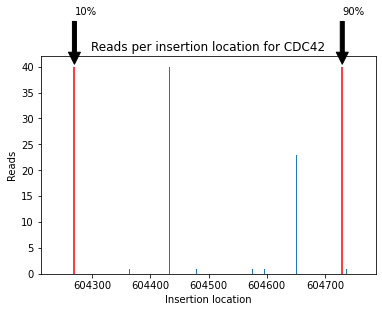

In [4]:
 ## prototype for one gene
from from_excel_to_list import from_excel_to_list

a=list_data_pd.loc[keys[0],"Gene name"]
gene="CDC42"
index_gene=np.where(a==gene)[0][0]

reads_vector=from_excel_to_list( list_data_pd.loc[keys[0],"Reads per insertion location"][index_gene])
plt.bar(from_excel_to_list( list_data_pd.loc[keys[0],"Insertion locations"][index_gene]),
reads_vector)


start_location=list_data_pd.loc[keys[0],"Start location"][index_gene]
end_location=list_data_pd.loc[keys[0],"End location"][index_gene]
length=end_location-start_location

length_10_first=0.1*length
length_10_last=0.9*length

plt.xlabel("Insertion location")
plt.ylabel("Reads")

plt.title("Reads per insertion location for " + gene )
plt.xlim(start_location,end_location)

plt.vlines(ymax=np.max(reads_vector),ymin=0,x=start_location+length_10_first,color="red")
plt.vlines(ymax=np.max(reads_vector),ymin=0,x=start_location+length_10_last,color="red")

plt.annotate("10%",xy=(start_location+length_10_first,np.max(reads_vector)),xytext=(start_location+length_10_first,np.max(reads_vector)+10),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("90%",xy=(start_location+length_10_last,np.max(reads_vector)),xytext=(start_location+length_10_last,np.max(reads_vector)+10),arrowprops=dict(facecolor='black', shrink=0.05))

In [15]:
keys

['dbem3_b',
 'dnrp1_b',
 'bem1-aid_a',
 'dnrp1_a',
 'dbem1dbem3_b',
 'wt_merged',
 'dbem1dbem3_a',
 'bem1-aid-dbem3_a',
 'bem1-aid-dbem3_b',
 'wt_b',
 'wt_a',
 'dnrp1_merged',
 'bem1-aid_b',
 'dbem3_merged',
 'dbem3_a']

In [5]:
from from_excel_to_list import from_excel_to_list

def plot_reads_per_insertion_location(gene,keys):
    """[summary]

    Parameters
    ----------
    gene : [type]
        [description]
    keys : [type]
        [description]
    """

    fig,axes=plt.subplots(4,4,figsize=(25,10))
    density_vector_array=[]

    for i in np.arange(0,len(keys)):

        a=list_data_pd.loc[keys[i],"Gene name"]
        index_gene=np.where(a==gene)[0][0]
        
        reads_vector=from_excel_to_list( list_data_pd.loc[keys[i],"Reads per insertion location"][index_gene])
        
        

        start_location=list_data_pd.loc[keys[i],"Start location"][index_gene]
        end_location=list_data_pd.loc[keys[i],"End location"][index_gene]
        length=end_location-start_location

        if type(reads_vector)!=int:
            density_vector_array.append(len(reads_vector)/length)
        else:
            density_vector_array.append(0)
        
        length_10_first=0.1*length
        length_10_last=0.9*length

       
        plt.subplot(4,4,i+1)

        plt.bar(from_excel_to_list( list_data_pd.loc[keys[i],"Insertion locations"][index_gene]),
        reads_vector)

        plt.xlabel("Insertion location")
        plt.ylabel("Reads")
        
        plt.title("back:"+keys[i] + "_" + gene )
        plt.xlim(start_location,end_location)
        
        plt.vlines(ymax=np.max(reads_vector)/2,ymin=0,x=start_location+length_10_first,color="red")
        plt.vlines(ymax=np.max(reads_vector)/2,ymin=0,x=start_location+length_10_last,color="red")
        
        plt.annotate("10%",xy=(start_location+length_10_first,np.max(reads_vector)/2),arrowprops=dict(facecolor='black', shrink=0.05))
        plt.annotate("90%",xy=(start_location+length_10_last,np.max(reads_vector)/2),arrowprops=dict(facecolor='black', shrink=0.05))

       

    plt.subplot(4,4,16)
    plt.bar(keys,density_vector_array,alpha=0.5);
    plt.xticks(rotation=90)
    plt.ylabel("Transposon density")

    plt.tight_layout()

       

    return fig,density_vector_array
    

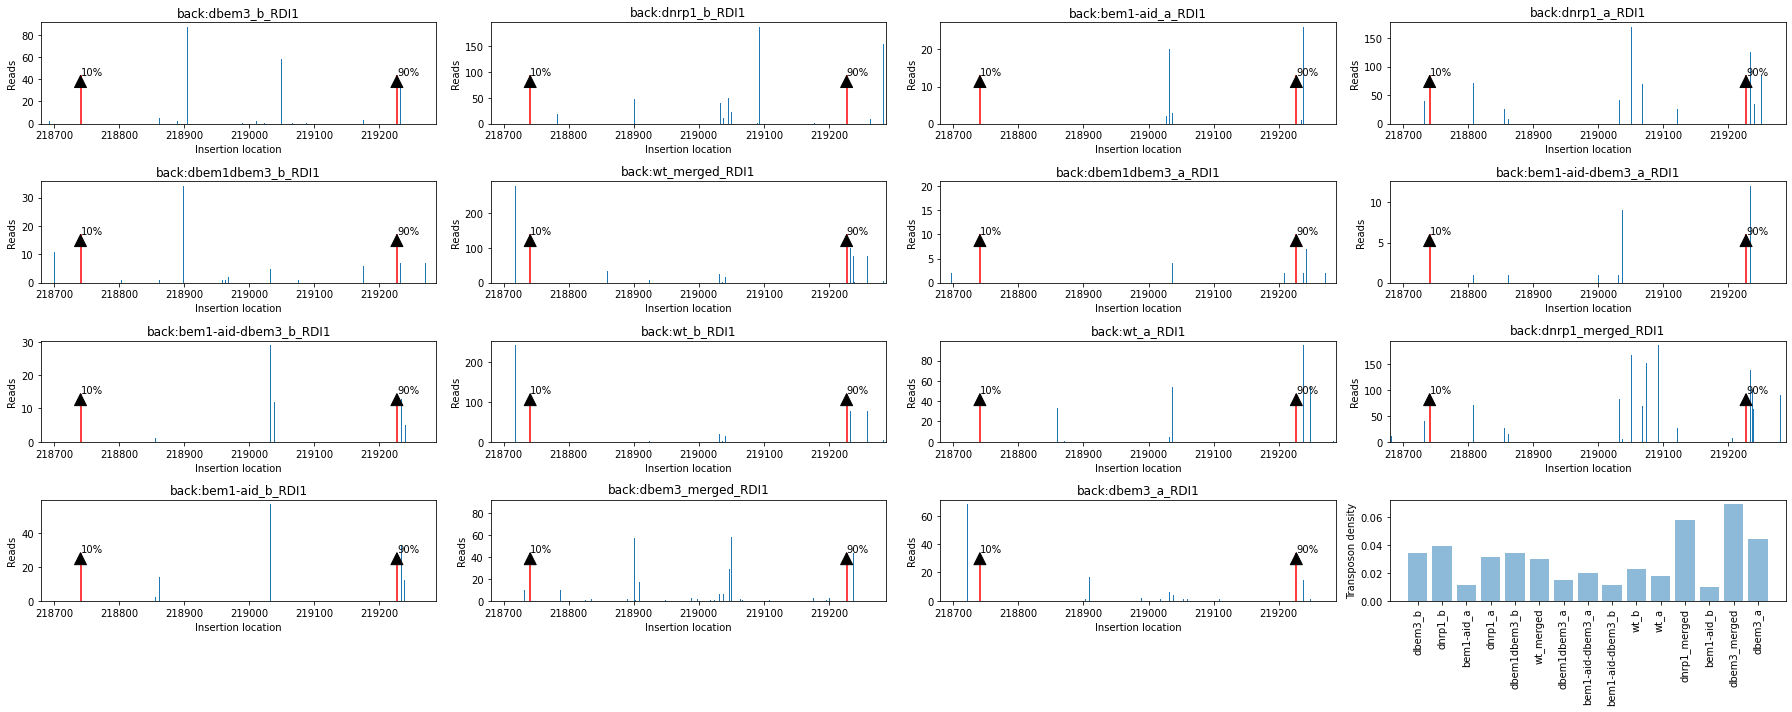

In [88]:
figure,density_array=plot_reads_per_insertion_location("RDI1",keys)

#figure.savefig("../figures/reads_per_insertion_location_BEM3.png")

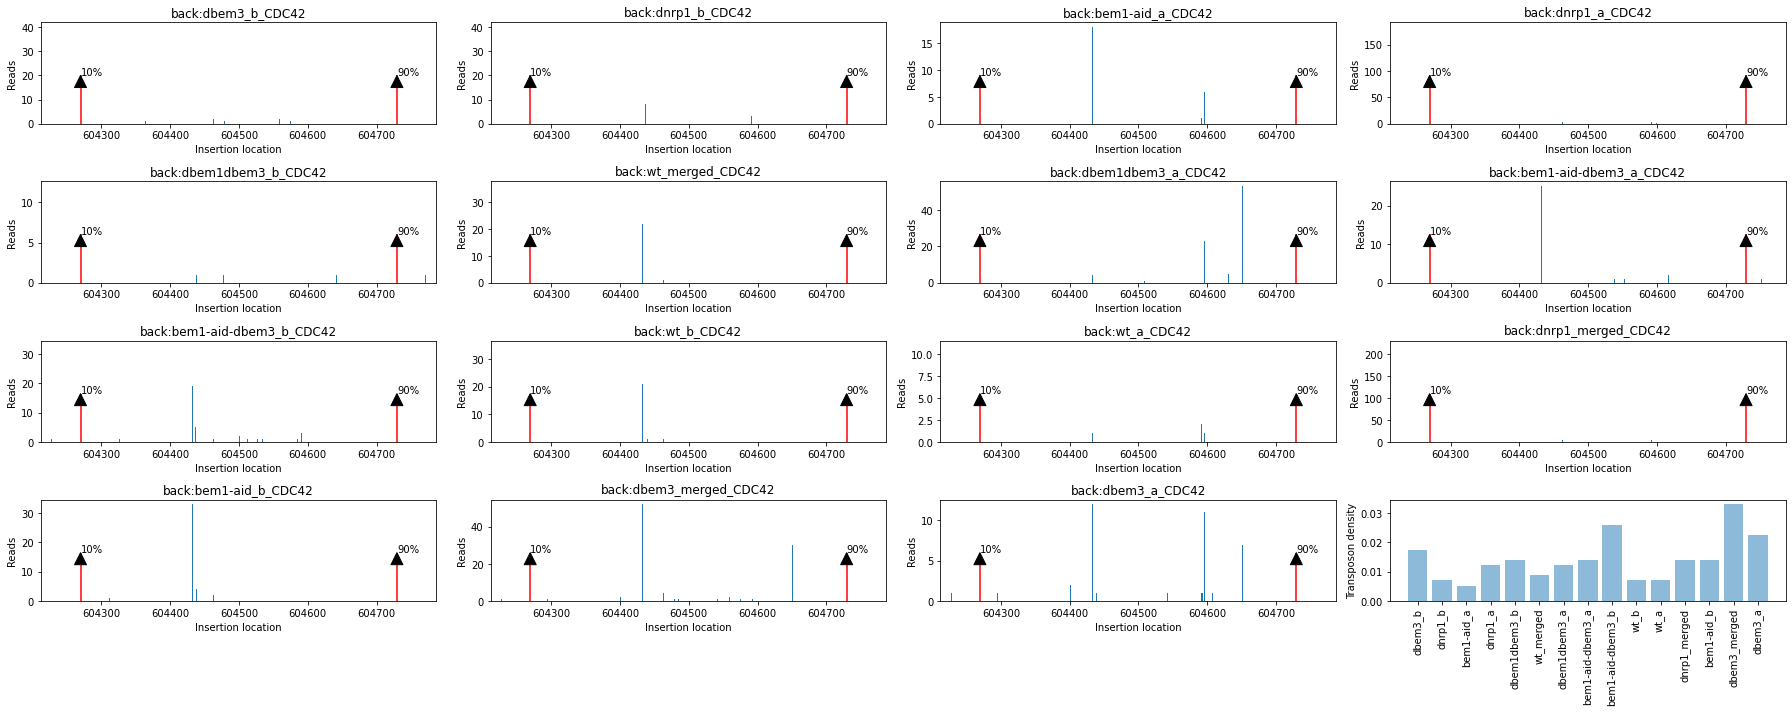

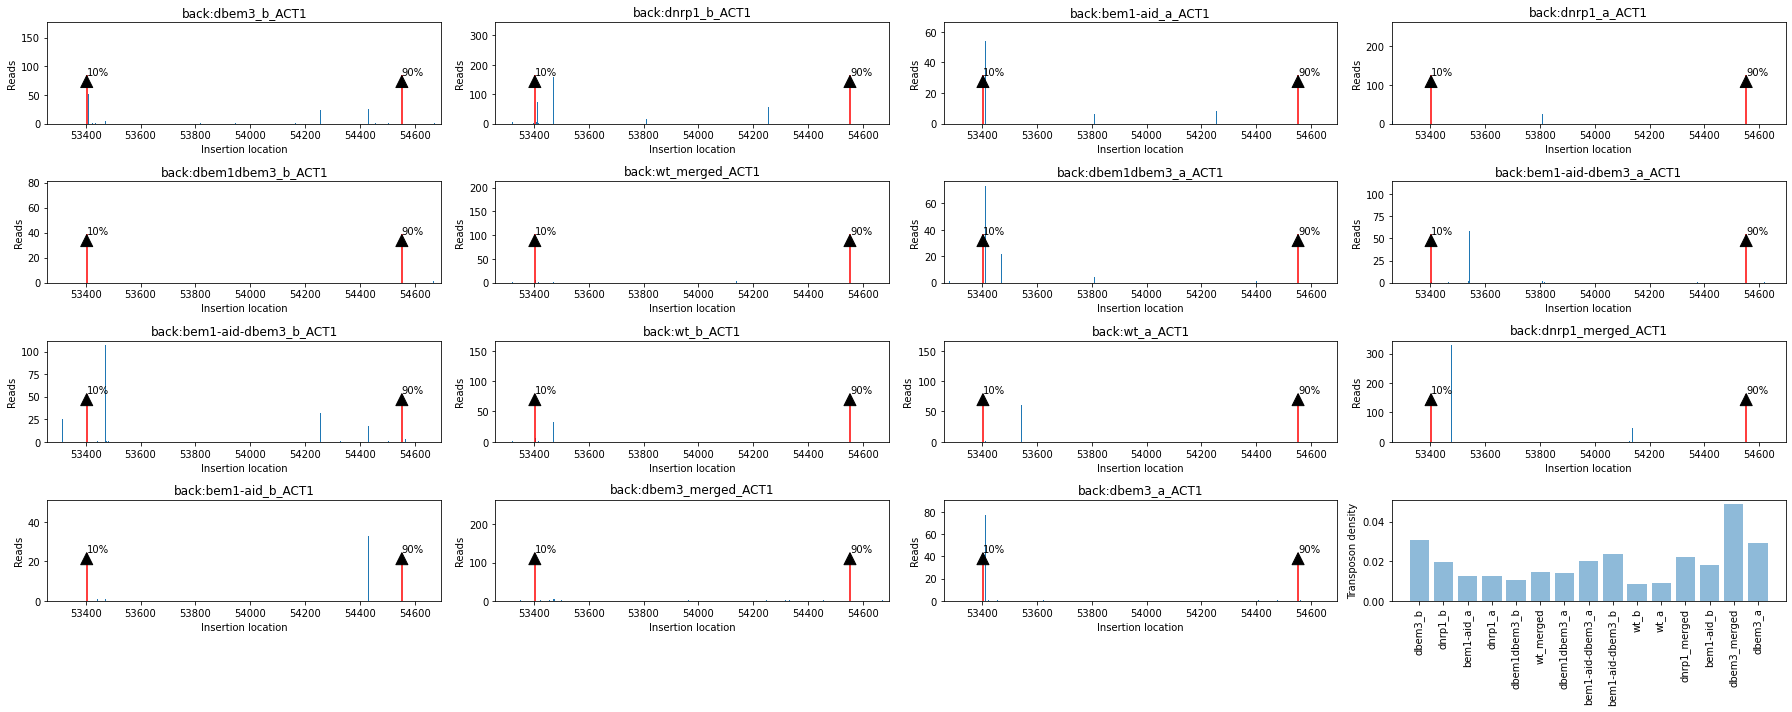

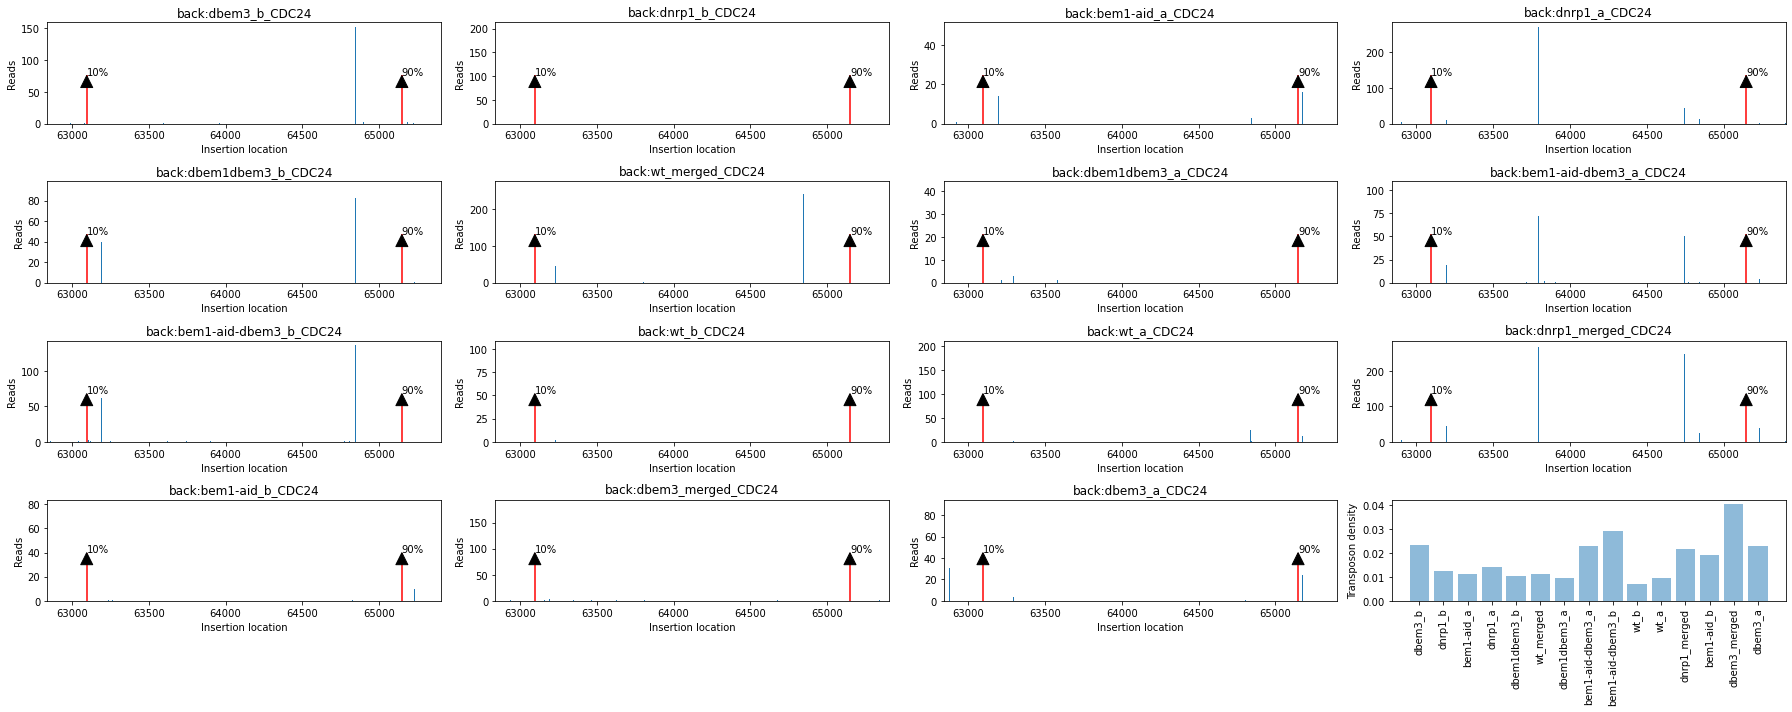

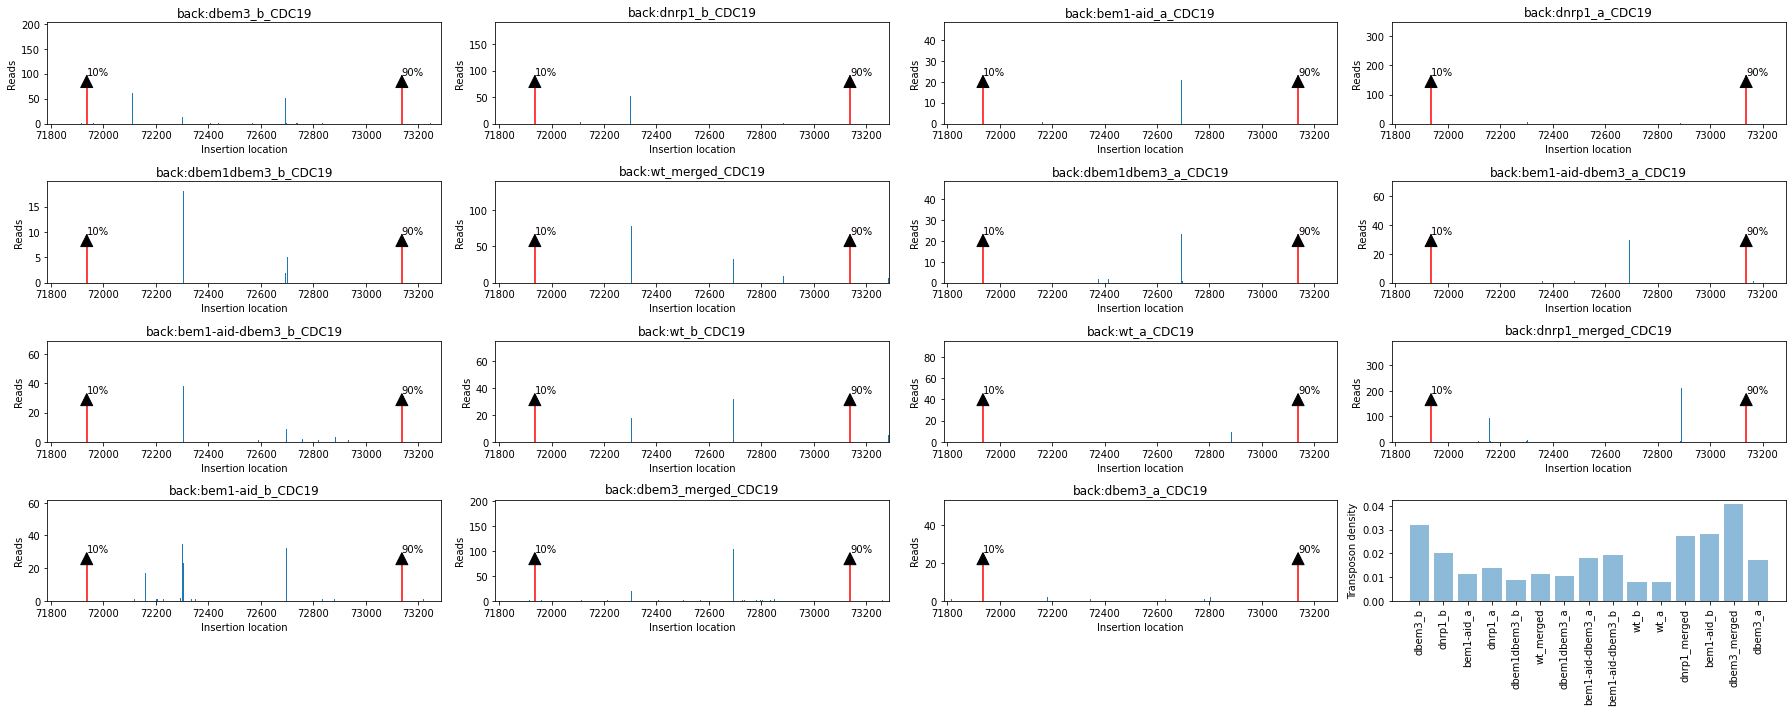

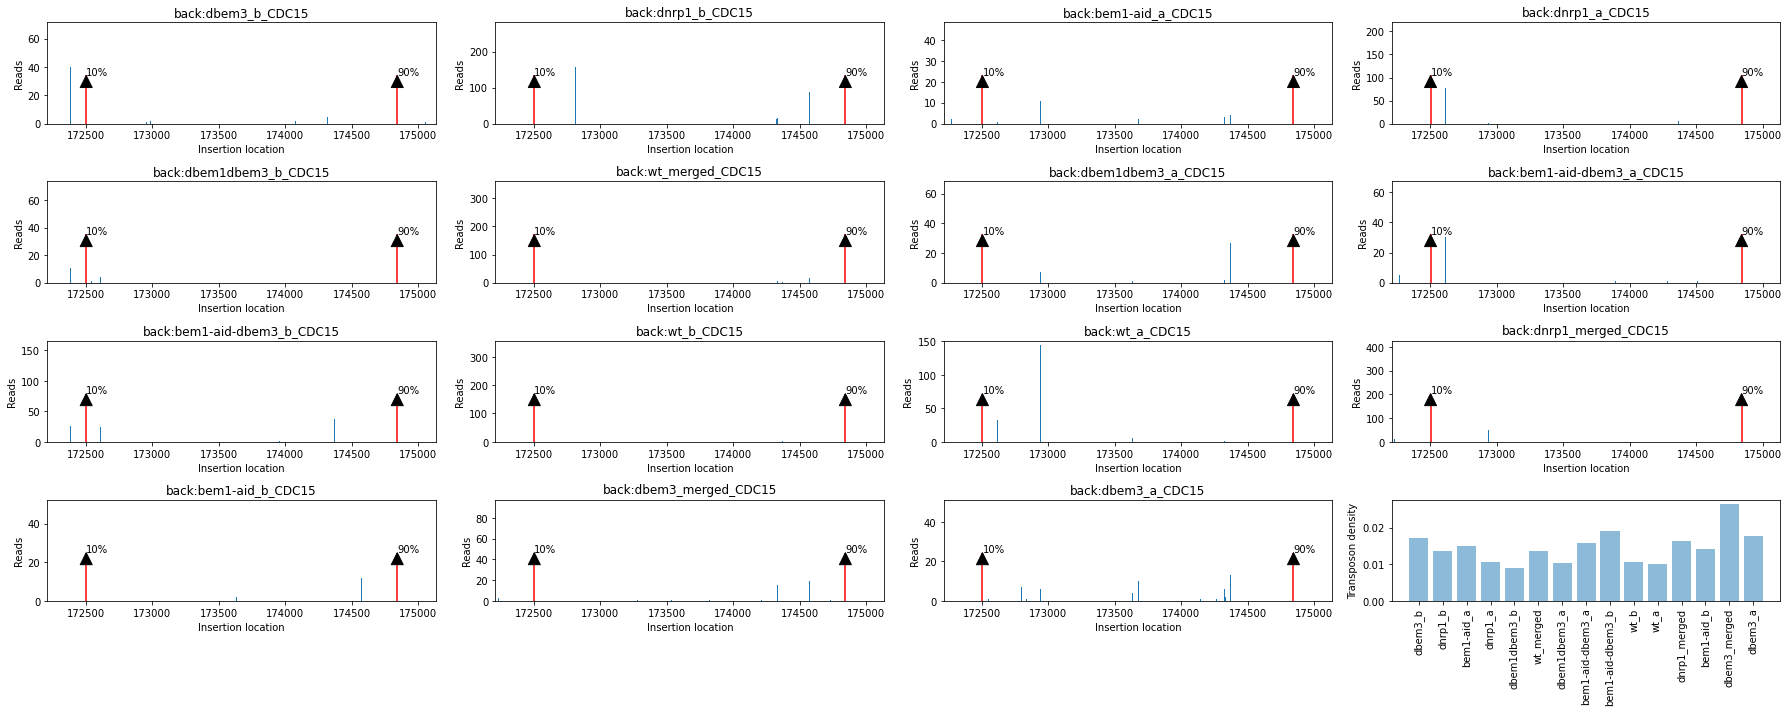

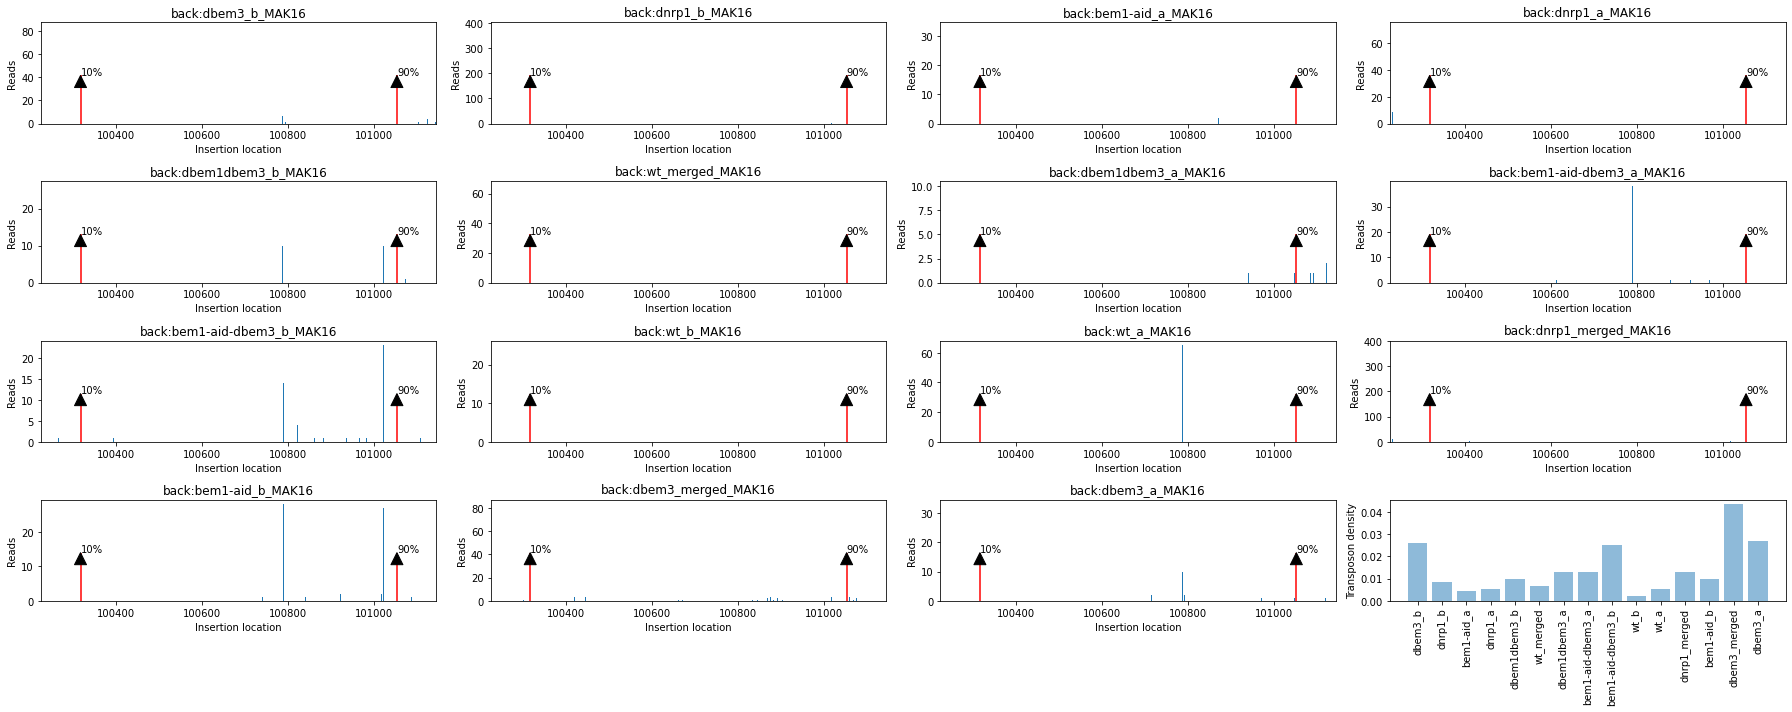

In [6]:
## Plot reads per tranposons over the genes in essential genes  

essential_genes=["CDC42","ACT1","CDC24", "CDC19","CDC15","MAK16"]

for genes in essential_genes:
    figure,density_array=plot_reads_per_insertion_location(genes,keys)
    #figure.savefig("../figures/reads_per_insertion_location_"+genes+".png")